- Applicant name: Yefeng Wang
- Applicant e-mail: stoch_adv@protonmail.com

# Introduction

This notebook showcases how to select stock pairs from S&P 500 constitutents for mean-reversion pair trading based on the procedure from [1].

Currently, there are 505 stocks that constitute the S&P 500 index. It would be unreasonable to consider every possible pairs as there would be $\binom{505}{2}$ pairs, which are 127,260 pairs in numbers. So to narrow down the stock pairs universe, we resort to PCA and OPTICS clustering to narrow down the stock pairs universe.

After completing the PCA and OPTICS clustering, we will calculate the hedge ratio between the pairs to ensure cointegration between two stocks. Then we will look into the mean-reversion properties of the cointegrated pairs, which include Hurst exponent, mean-reversion half life, and total times of the spread crossover the mean.

# Method Overview & Results

![Method Overview](overview.jpg)

## Part A & B: Narrow down the stock pairs universe

We narrow down the stock pairs universe following steps:
- Compute percentage returns of each stock.
- Standardize the returns into Z-scores.
- Perform PCA on the Z-scores.
- Clustering on the PCA representation of the percentage returns using OPTICS.
- Generate pairs within each clusters.

Although the original paper suggests using 5-minute intraday data, unfortunately, the `yfinance` package did not work properly when downloading 5-minute data. For demonstration purposes, we used daily data starting from Jan 4th, 2016 (The first trading day of 2016) to date, which approximately amounts to 5 years' worth of data. If a stock doesn't have historical data that date back to 5 years ago, we drop the stock from the universe.

We can perform these steps simply by calling the function `form_pairs()`.

In [12]:
from PairFilter import PairFilter
from random import sample
%matplotlib inline

In [2]:
pair_selector = PairFilter("2016-01-04")
pair_selector.form_pairs()

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted


The PCA and OPTICS clustering successfully narrowed down the pairs candidate from 127,260 to around 500 pairs.

In this demonstration, we compressed the percentage return into 8 dimensions.

After the module completed PCA and OPTICS:
- We can access the list of pairs generated by this methodology via a property of `PairFilter` class: `pairs`
- We can check which stocks are clustered together via a property of `PairFilter` class: `cluster_dict`
- We can make plots of principal components (distribution and pairwise correlation) with function `plot_pca()`
- We can make a t-SNE plot of clustering results with function `plot_clusters()`

In [3]:
len(pair_selector.pairs)

488

In [5]:
pair_selector.cluster_dict

{'Cluster 0': ('BSX', 'EW', 'IQV', 'MCD', 'MDT', 'SYK', 'TFX'),
 'Cluster 1': ('FDX', 'HPE', 'NWS', 'NWSA', 'WRK'),
 'Cluster 2': ('ANTM', 'CI', 'DGX', 'HUM', 'LH', 'UNH'),
 'Cluster 3': ('F', 'RHI', 'SNA', 'TPR', 'VFC'),
 'Cluster 4': ('ADI',
  'AMAT',
  'LRCX',
  'MCHP',
  'MU',
  'NVDA',
  'QRVO',
  'SWKS',
  'TER'),
 'Cluster 5': ('AMP', 'FRC', 'GS', 'LNC', 'MET', 'MS', 'PRU', 'UNM'),
 'Cluster 6': ('HBAN', 'JPM', 'PNC', 'TFC', 'USB', 'WFC'),
 'Cluster 7': ('AFL', 'AIG', 'AXP', 'DFS', 'SYF'),
 'Cluster 8': ('AIZ', 'ALL', 'CB', 'RE', 'TRV'),
 'Cluster 9': ('CHD',
  'CL',
  'CLX',
  'CPB',
  'GIS',
  'HRL',
  'K',
  'KMB',
  'MKC',
  'PEP',
  'PG'),
 'Cluster 10': ('DRI', 'LOW', 'ROST', 'SEE', 'ULTA', 'VMC'),
 'Cluster 11': ('APA',
  'BKR',
  'COP',
  'CXO',
  'DVN',
  'EOG',
  'FANG',
  'FTI',
  'HAL',
  'HES',
  'MRO',
  'NOV',
  'OXY',
  'PXD',
  'SLB',
  'XOM'),
 'Cluster 12': ('APTV', 'EXPE', 'HLT', 'MAR', 'MGM'),
 'Cluster 13': ('AEE',
  'AEP',
  'ATO',
  'AWK',
  'CMS',
  'D',

### PCA feature vector visualization 

The distribution of each principal component (PC) and the correlation between every PC pair can be shown as follows.

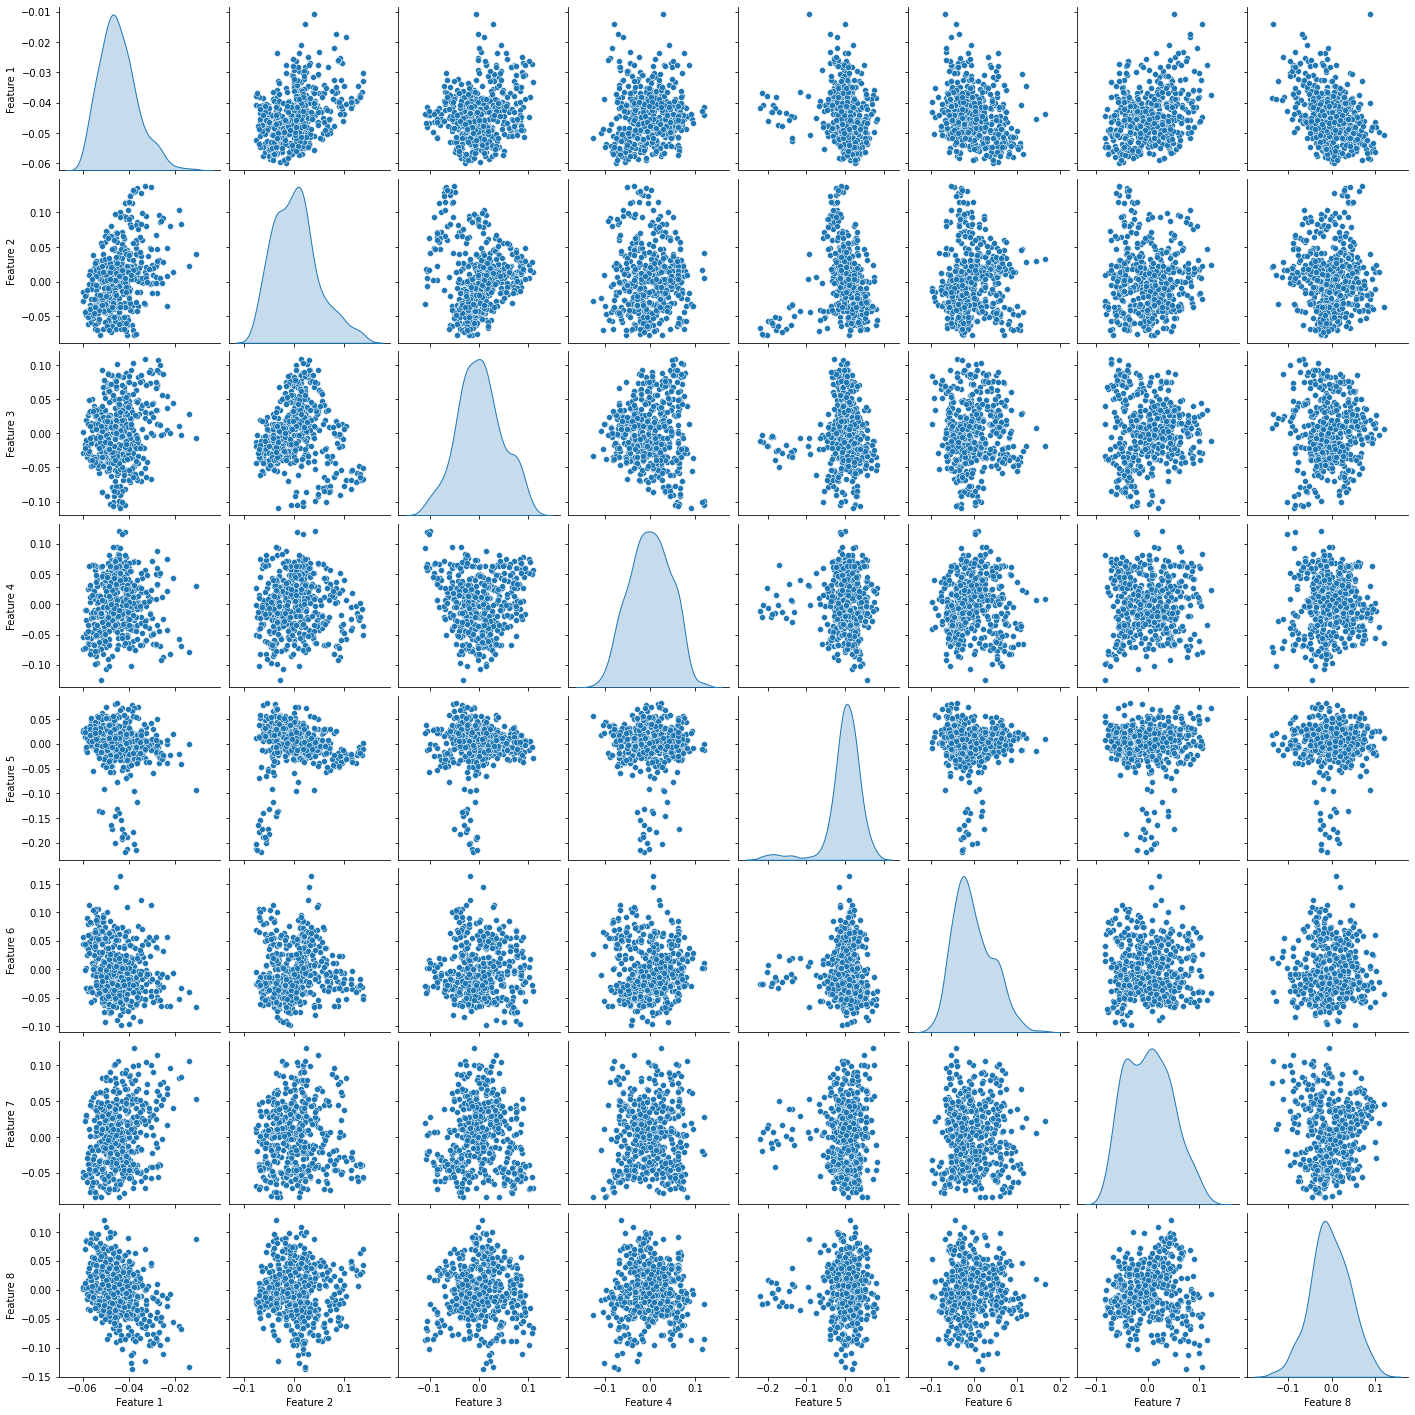

In [6]:
pair_selector.plot_pca()

### OPTICS clustering visualization

Using T-SNE to further project this 8-dimension feature space onto a 2d plot, we show the clustering result.

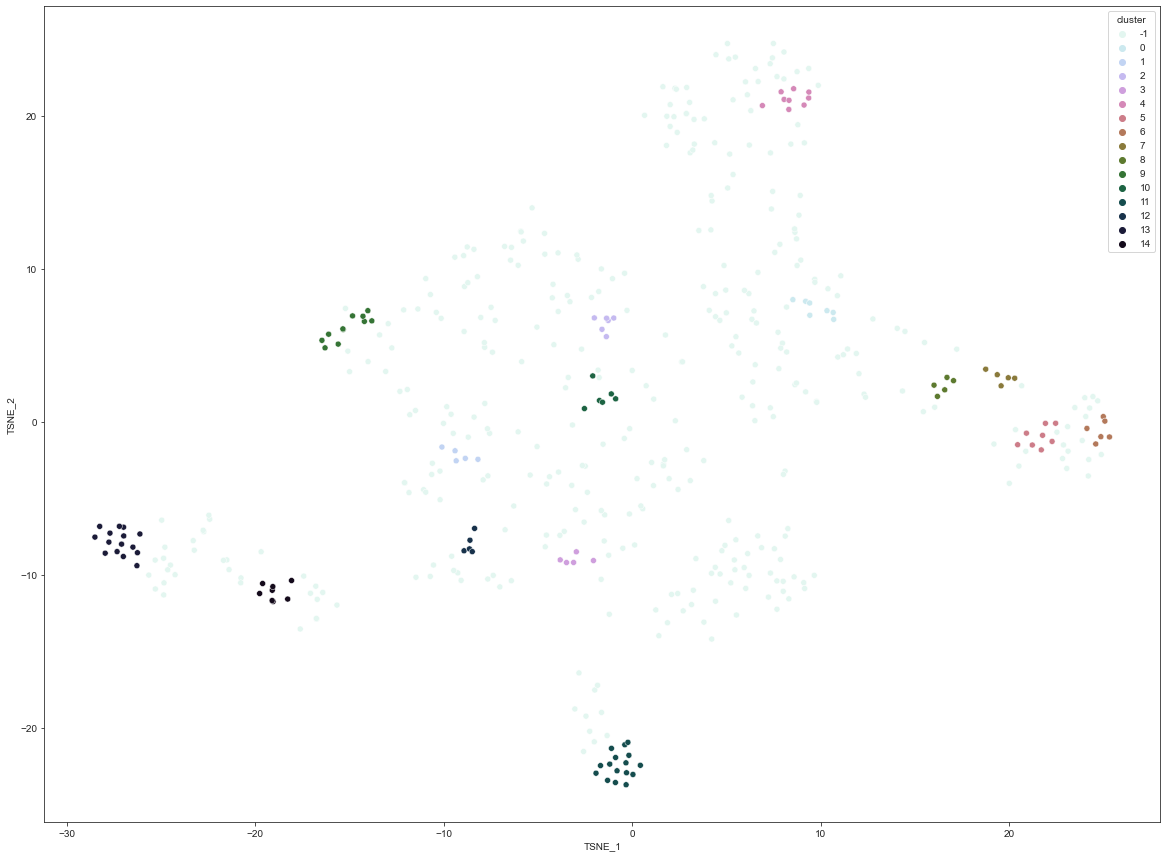

In [7]:
pair_selector.plot_clusters()

## Part C: Cointegration, Hurst Exponent, Half-life and Mean Crossovers

When it comes to pair trading, cointegration test is important. Not all linear combinations of two stocks are stationary.

In this part, we will use Engle-Granger test to verify cointegration between two stocks and get the hedge ratio. This is done by the `engle_granger` function from `arch` package.

After cointegration test, we would build the spread according to the hedge ratio and then test the following:
- Hurst Exponent
- Mean Reversion Half Life
- Number of times crossing over the mean

Since the sequence of filters application matters, I have encapsulated the filtering process into a single function `filter_pair()`.

In [9]:
pair_selector.filter_pair()

[('DVN', 'NOV'),
 ('IQV', 'MCD'),
 ('LRCX', 'TER'),
 ('MCD', 'SYK'),
 ('CB', 'TRV'),
 ('AIV', 'ESS'),
 ('RE', 'TRV'),
 ('ESS', 'UDR'),
 ('EQR', 'ESS'),
 ('NWS', 'NWSA'),
 ('AIV', 'EQR'),
 ('D', 'EVRG'),
 ('HUM', 'UNH'),
 ('EW', 'TFX'),
 ('AEP', 'LNT'),
 ('AMP', 'FRC'),
 ('CHD', 'MKC'),
 ('AMP', 'MS'),
 ('CMS', 'LNT'),
 ('ES', 'XEL'),
 ('ES', 'WEC'),
 ('DUK', 'ED'),
 ('CB', 'RE'),
 ('WEC', 'XEL')]

In [10]:
len(pair_selector.final_pairs)

24

After filtering, only 24 pairs were selected as feasible candidates for mean-reversion pair trading. From more than 127,000 pairs, we narrowed down our range into 24 pairs!

# Discussion

### Do the selected pairs make sense?

Usually, the stocks that can form a long-short trading pair share some connections. Let's see if this is the case.

In [11]:
pair_selector.pair_summary()

,Stock 1,Stock 1 Sector,Stock 1 Sub-Industry,Stock 2,Stock 2 Sector,Stock 2 Sub-Industry
0,DVN,Energy,Oil & Gas Exploration & Production,NOV,Energy,Oil & Gas Equipment & Services
1,IQV,Health Care,Life Sciences Tools & Services,MCD,Consumer Discretionary,Restaurants
2,LRCX,Information Technology,Semiconductor Equipment,TER,Information Technology,Semiconductor Equipment
3,MCD,Consumer Discretionary,Restaurants,SYK,Health Care,Health Care Equipment
4,CB,Financials,Property & Casualty Insurance,TRV,Financials,Property & Casualty Insurance
5,AIV,Real Estate,Residential REITs,ESS,Real Estate,Residential REITs
6,RE,Financials,Reinsurance,TRV,Financials,Property & Casualty Insurance
7,ESS,Real Estate,Residential REITs,UDR,Real Estate,Residential REITs
8,EQR,Real Estate,Residential REITs,ESS,Real Estate,Residential REITs
9,NWS,Communication Services,Publishing,NWSA,Communication Services,Publishing


The results corroborated our hypothesis: Most of the pairs belong to the same sector/industry.

### Price Action

In [15]:
plot_pairs = pair_selector.final_pairs
plot_examples = sample(range(len(plot_pairs)), 5)
plot_examples

[15, 0, 18, 3, 11]

We would plot 5 example pairs below.

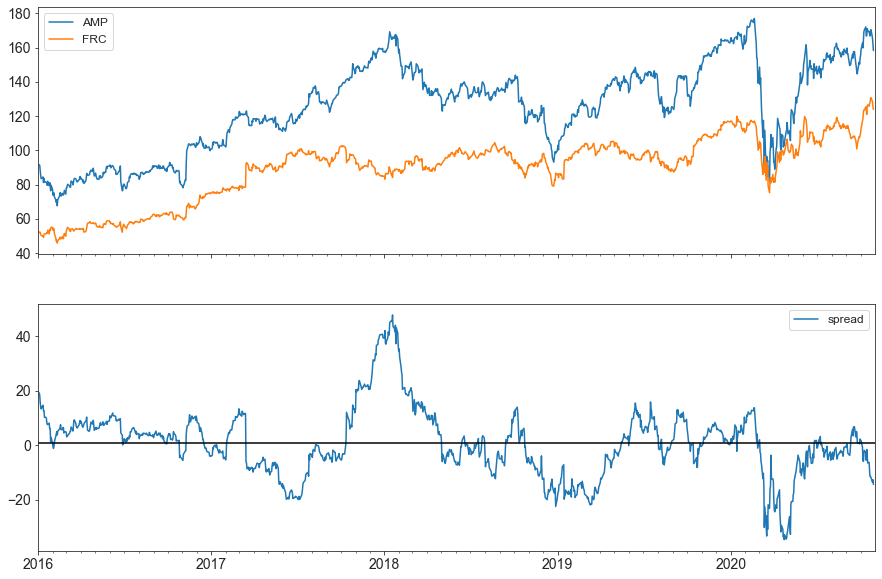

In [16]:
pair_selector.plot_spread(plot_pairs[plot_examples[0]])

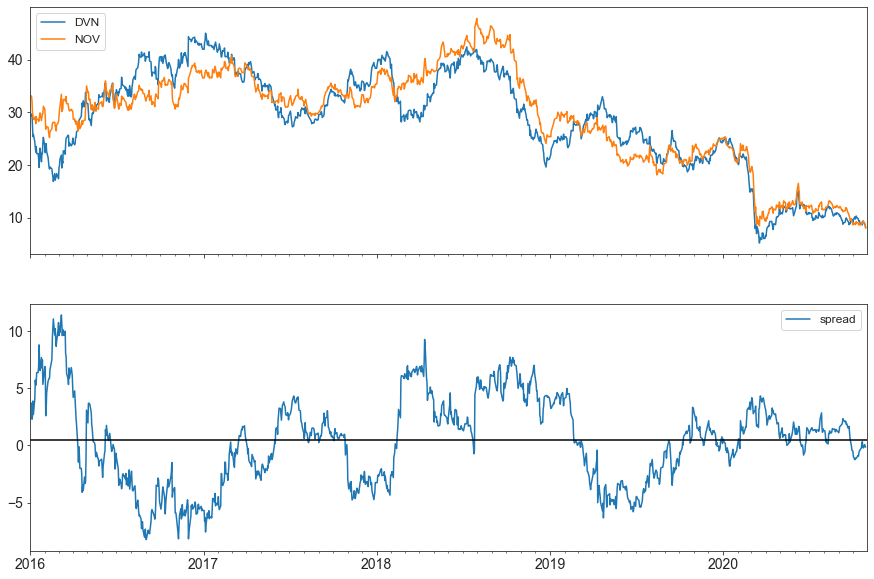

In [17]:
pair_selector.plot_spread(plot_pairs[plot_examples[1]])

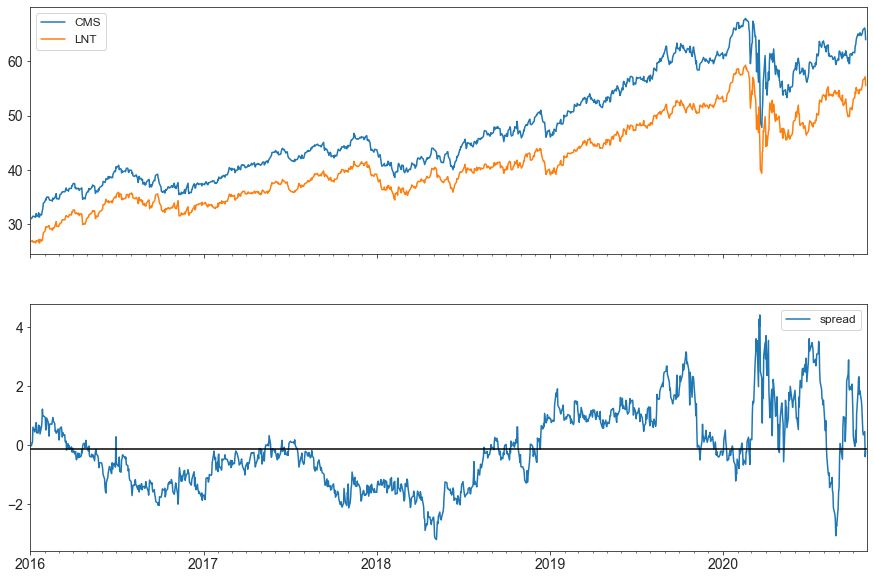

In [18]:
pair_selector.plot_spread(plot_pairs[plot_examples[2]])

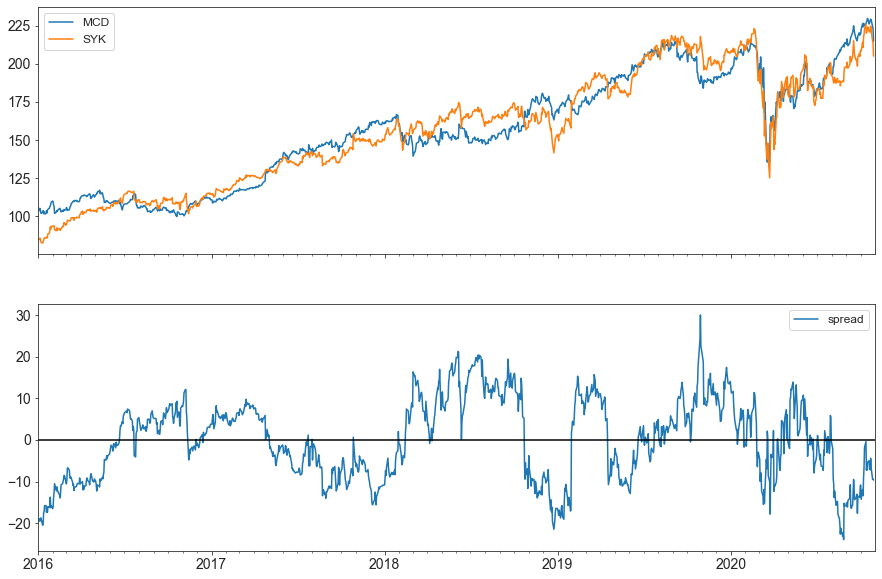

In [19]:
pair_selector.plot_spread(plot_pairs[plot_examples[3]])

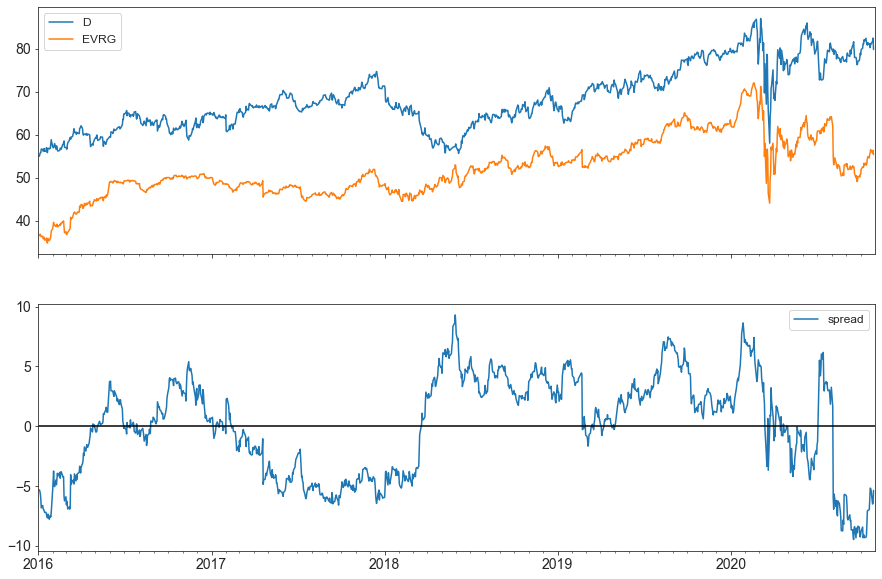

In [20]:
pair_selector.plot_spread(plot_pairs[plot_examples[4]])

# Conclusion

In this brief report, I implemented the stock-pair selection procedure described in [1]. The procedure successfully narrowed down tradable pairs from 127,260 possible pairings formed by S&P 500 constituents to 488 candidates.

After testing for cointegration and filtering by Hurst exponent, mean-reversion half life, and the times the spread crosses over its mean, I further narrowed down the searching range into 24 pairs, which is now acceptable for building a portfolio.

To verify that the pairs found by this procedure make sense, I checked the GICS sub-industry of the stocks within each pair and found among these 24 pairs, 22 of them are formed by stocks in the same sub-industry. I also visually checked the spread's price action, and it can be seen that the spread is nicely oscillating around its 5-year mean.

# Reference

[1] Simao MS, Nuno H, Enhancing a Pairs Trading Strategy with the application of Machine Learning.